# Assignment 3: Convolutional neural networks for classification
Course: 8P361  &emsp;&emsp;  Group: 10

Helgers, V.M.J. 	&emsp;&emsp; 1329332 <br>
Jong, de R.L.P.D. 	&emsp; 1328328 <br>
Korsten, T.		    &emsp;&emsp;&emsp;&emsp; 1340522 <br>
Moharir, S. 		&emsp;&emsp;&emsp;&emsp; 1296256 <br>

## Important notes

1. Note that all functions needed to execute this notebook can be found in the cnn.py file. To this file a function that performs ROC analysis has been added as well as a function that creates a fully convolutional neural network (FCN) model. Therefore this notebook can only be executed with the use of this adjusted cnn.py file.

2. If one wants to run this notebook it is important to add the right path to the image data within the function 'get_pcam_generators' which is called below.

## Before starting the exercises

Before starting on the excercises the cnn model is made, trained, and evaluated.

### 1. First, import the relevant functions.

In [1]:
import os

import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow import keras

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

# the size of the images in the PCAM dataset
IMAGE_SIZE = 96

### 2. Next, Get the model and data generators.
To get the model and data generators functions need to be imported from cnn.py. Note that you have to specify the path where the images are located on your PC.

In [2]:
from cnn import get_model
from cnn import get_pcam_generators

# get the model
model = get_model()

# get the data generators
train_gen, val_gen = get_pcam_generators('C:/Users/20182054/Documents/BIA Data')

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


### 3. Training and evaluating the model

The model can be trained using data generated by the data generators. Finally, the model is also evaluated.

In [7]:
# save the model and weights
model_name = 'my_first_cnn_model'
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

model_json = model.to_json() # serialize model to JSON
with open(model_filepath, 'w') as json_file:
    json_file.write(model_json) 


# define the model checkpoint and Tensorboard callbacks
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(os.path.join('logs', model_name))
callbacks_list = [checkpoint, tensorboard]


# train the model
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=3,
                    callbacks=callbacks_list)

C:\Users\20182786\Anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
4500/4500 [==============================] - 1031s 229ms/step - loss: 0.5355 - accuracy: 0.7233 - val_loss: 0.4336 - val_accuracy: 0.7962

Epoch 00001: val_loss improved from inf to 0.43361, saving model to my_first_cnn_model_weights.hdf5
Epoch 2/3
4500/4500 [==============================] - 1087s 242ms/step - loss: 0.3892 - accuracy: 0.8277 - val_loss: 0.3455 - val_accuracy: 0.8535

Epoch 00002: val_loss improved from 0.43361 to 0.34550, saving model to my_first_cnn_model_weights.hdf5
Epoch 3/3
4500/4500 [==============================] - 915s 203ms/step - loss: 0.3398 - accuracy: 0.8539 - val_loss: 0.3620 - val_accuracy: 0.8451

Epoch 00003: val_loss did not improve from 0.34550


## Exercise 1

The PatchCAMELYON challenge on Kaggle uses the area under the ROC curve as an evaluation measure. Describe the concept of ROC curve analysis and the area under the ROC curve (AUC) as an evaluation measure. Then, using methods from the sklearn Python toolbox (the required functions are alerady imported), perform ROC curve analysis and computation of the AUC for your model. 

Note that you will have to do this analysis on the validation set (since you do not have access to the ground truth for the test set). 

### 1.1 ROC curve analysis and AUC computation
A function to make an ROC curve and to display the AUC has been made in cnn.py. The result of executing this function on the trained model is shown in the next block.

C:\Users\20182786\Anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


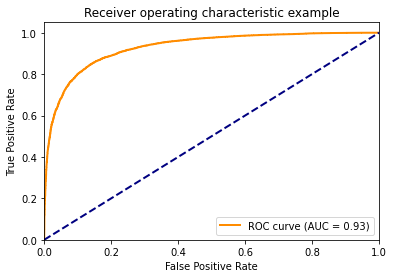

In [12]:
from cnn import ROC_curve

ROC_curve(model, val_gen)

## Exercise 2

It is possible to construct a neural network model that is equivalent to the model above, however, only using convolutional layers (i.e. without using any fully connected or "dense" layers). Construct and train such a model. 

What would be the advantage of only using convolutional layers?



### 2.1 Get the model 

A function has been made in cnn.py that creates a fully convolutional neural network (FCN) model. This function is first imported and then applied to get the model.

In [5]:
from cnn import get_model2

# get the model
model2 = get_model2()

### 2.2 Training and evaluating the model

The new FCN model can be trained using data generated by the data generators. Finally, the model is also evaluated.

In [6]:
# save the model and weights
model_name = 'my_second_cnn_model'
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

model_json2 = model2.to_json() # serialize model to JSON
with open(model_filepath, 'w') as json_file:
    json_file.write(model_json2) 


# define the model checkpoint and Tensorboard callbacks
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(os.path.join('logs', model_name))
callbacks_list = [checkpoint, tensorboard]


# train the model
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

history = model2.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=3,
                    callbacks=callbacks_list)

C:\Users\20182054\Anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
4500/4500 [==============================] - 1319s 293ms/step - loss: 0.5616 - accuracy: 0.7049 - val_loss: 0.4519 - val_accuracy: 0.7889

Epoch 00001: val_loss improved from inf to 0.45188, saving model to my_second_cnn_model_weights.hdf5
Epoch 2/3
4500/4500 [==============================] - 1259s 280ms/step - loss: 0.4336 - accuracy: 0.8040 - val_loss: 0.4046 - val_accuracy: 0.8179

Epoch 00002: val_loss improved from 0.45188 to 0.40464, saving model to my_second_cnn_model_weights.hdf5
Epoch 3/3
4500/4500 [==============================] - 1133s 252ms/step - loss: 0.3999 - accuracy: 0.8217 - val_loss: 0.3707 - val_accuracy: 0.8372

Epoch 00003: val_loss improved from 0.40464 to 0.37068, saving model to my_second_cnn_model_weights.hdf5


## Exercise 3

Use the `kaggle_submission.py` file to prepare and submit results for evaluation to Kaggle. What is the result of the evaluation on the test set? How does it compare to the evaluation that you performed on the validation set?

### 3.1 Answer

The submission.py file was used to make a submission for Kaggle based on the model trained in exercise 1. The submission was uploaded to Kaggle and an AUC of 0.8769 was obtained. This is lower than the AUC of the validation set found in exercise 1. A reason for this might be that the data sets are not perfectly shuffled which could imply that the validation set has cases that are somehow easier to predict. 